# Распознавание рукописных цифр из набора данных MNIST

In [1]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import utils, optimizers
import numpy as np
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных с рукописными цифрами**

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**Преобразование размерности данных в наборе**

In [3]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

**Нормализация данных**

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Работа с правильными ответами**

In [5]:
n = 100
print(y_train[n])

5


**Преобразуем метки в формат one hot encoding**

In [6]:
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [7]:
print(Y_train[n])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [8]:
model = Sequential()

**Добавляем уровни сети**

In [9]:
model.add(Dense(784, input_dim=784, activation="relu"))
model.add(Dense(28, input_dim=28, activation="relu"))
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [10]:
sgd = optimizers.SGD(lr=0.01, clipnorm=1.)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 28)                21980     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                290       
Total params: 637,710
Trainable params: 637,710
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [11]:
history = model.fit(X_train, Y_train, batch_size=100, epochs=25, validation_split=0.1, verbose=0)

## Оцениваем качество работы сети

**Качество работы сети на тестовых данных**

In [12]:
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

10000/10000 [==============================] - 1s 71us/step
Точность работы на тестовых данных: 96.50%


**График качества во время обучения**

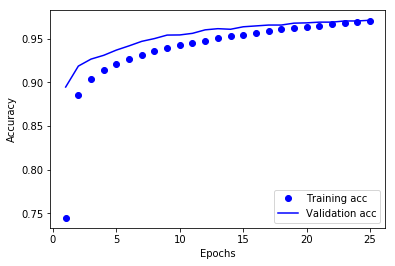

In [13]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Используем сеть для распознавания рукописных цифр

In [14]:
for i in range (0, 10):
    n_rec = randint(0,10000)
    x = X_test[n_rec]
    x = np.expand_dims(x, axis=0)
    prediction = np.argmax(model.predict(x))
    print(prediction, '=', y_test[n_rec], prediction == y_test[n_rec])

3 = 3 True
3 = 3 True
4 = 4 True
2 = 2 True
7 = 7 True
1 = 1 True
4 = 4 True
3 = 3 True
8 = 8 True
6 = 6 True
